In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


# Veri Setinin Okunması

In [2]:
df = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")

# Kütüphanelerin Çağrılması:

In [3]:
import matplotlib.pyplot as plt  #Temel grafik ve görselleştirmeler oluşturmak için.
import seaborn as sns            #Dağılım grafikleri, ısı haritaları ve kategorik veri görselleştirme gibi işlemler için.
import math                      #Temel matematiksel işlemleri gerçekleştirmek için.

In [4]:
df.head()     #Veri setinin ilk 5 satırını inceleyelim.

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


* **Yukarıda yaptığım 'df.head()' işlemi sonucu veri seti ile ulaştığım bilgiler:**
1. Bu veri seti, her bir kredi kartı işlemi için farklı özellikler (kredi kartı numarası, işlem tutarı, işlem zamanı vb.) içermektedir.
1. Son sütun olan "is_fraud", modelin öğrenmesi gereken hedef değişkenidir. Eğer bu sütun 1 ise, işlem bir dolandırıcılık vakasıdır; eğer 0 ise normal bir işlemdir.

In [5]:
df.tail()  #Veri setinin son 5 satırını inceleyelim.

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [6]:
df.shape    #Satır ve sütun sayımız.

(1296675, 23)

In [7]:
df.info()    #Veri türlerini anlamak, her sütunda kaç tane eksik (NaN) değer olduğunu görmek ve eksik verileri tespit edip doldurma veya çıkarma işlemleri planlamak için. Aynı zamanda bellek kullanımı hakkında bilgi almak için.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df.dtypes 

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
df.is_fraud.value_counts()    #Veri setinizdeki dolandırıcılık (fraud) ve normal işlemler arasındaki dağılımı görelim.

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

-> 0 (normal işlemler) 1,289,169 kez, 1 (dolandırıcılık) ise 7,506 kez görülüyor. Bunu görselleştirelim.

<function matplotlib.pyplot.show(close=None, block=None)>

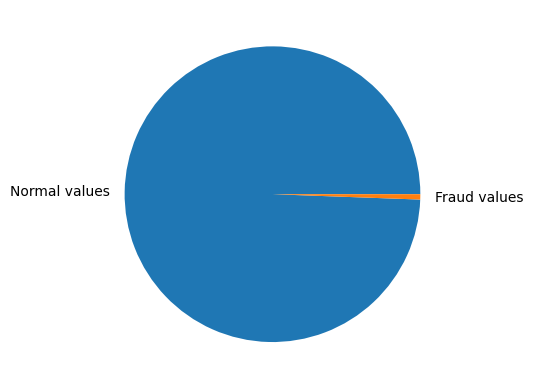

In [10]:
plt.pie(df.is_fraud.value_counts(), labels=["Normal values", "Fraud values"])
plt.show

In [11]:
df.drop_duplicates()    #Tekrar eden satırları listeden çıkaralım.

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


* **Satır ve sütun sayısını ilk baştaki 'df.info()' ile karşılaştırdığımda fark olmadığını görüyorum yani tekrar eden satır yok. Bunu bir foksiyon ile de görelim.**

In [12]:
df.duplicated().sum()

0

* **Veri çerçevesindeki eksik (NaN) değerleri içeren satırları kaldıralım.**

In [13]:
df.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


* **df.dropna() ile eksik değerleri kaldırdıktan sonra, veri setinde hala eksik veri olup olmadığını kontrol etmek için df.isnull() kullanalım.**

In [14]:
df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* **df.nunique() ile her sütundaki benzersiz değerlerin sayısını döndürelim ve kategorilerin çeşitliliğini görelim.**

In [16]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

* **Eğitimde işimize yaramayacak sütunları listeden kaldıralım.**

In [17]:
df = df.drop(columns=["Unnamed: 0", "first", "last", "state", "city_pop", "job", "dob"])

In [18]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,zip,lat,long,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,28654,36.0788,-81.1781,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,99160,48.8878,-118.2105,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,83252,42.1808,-112.2620,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,59632,46.2306,-112.1138,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,24433,38.4207,-79.4629,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [19]:
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
gender                         2
street                       983
city                         894
zip                          970
lat                          968
long                         969
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Veri setimizdeki kategorik verileri sayısal değerlere dönüştürmek için 'from sklearn.preprocessing import LabelEncoder' kullanalım.
* Bu sayede her kategorik değeri benzersiz bir sayısal etikete dönüştürerek veri setimizin modelleme süreci için uygun hale gelmesini sağlayalım.

In [20]:
from sklearn.preprocessing import LabelEncoder

* **merchant, category, street, trans_num, city, gender, trans_date_trans_time: Bu sütunlar, kategorik bilgilere sahip. LabelEncoder ile bu sütunlardaki her benzersiz kategoriye bir sayısal etiket atayalım.**

In [21]:
encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["street"] = encoder.fit_transform(df["street"])
df["trans_num"] = encoder.fit_transform(df["trans_num"])
df["city"] = encoder.fit_transform(df["city"])
df["gender"] = encoder.fit_transform(df["gender"])
df["trans_date_trans_time"] = encoder.fit_transform(df["trans_date_trans_time"])

In [22]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,zip,lat,long,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,0,568,526,28654,36.0788,-81.1781,56438,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,0,435,612,99160,48.8878,-118.2105,159395,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,1,602,468,83252,42.1808,-112.2620,818703,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,1,930,84,59632,46.2306,-112.1138,544575,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,1,418,216,24433,38.4207,-79.4629,831111,1325376186,38.674999,-78.632459,0


# Veri setimizi eğitim ve test setlerine ayırmak.
* **Eğitim seti modelin eğitilmesi için kullanılırken, test seti modelin henüz görmediği veriler üzerinde nasıl performans gösterdiğini test etmek için kullanılacak.**

In [23]:
from sklearn.model_selection import train_test_split

* Verimizi Eğitim ve Test setlerine ayıralım

In [24]:
train_data, test_data = train_test_split(df, test_size=0.3)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907672 entries, 572586 to 673762
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  907672 non-null  int64  
 1   cc_num                 907672 non-null  int64  
 2   merchant               907672 non-null  int64  
 3   category               907672 non-null  int64  
 4   amt                    907672 non-null  float64
 5   gender                 907672 non-null  int64  
 6   street                 907672 non-null  int64  
 7   city                   907672 non-null  int64  
 8   zip                    907672 non-null  int64  
 9   lat                    907672 non-null  float64
 10  long                   907672 non-null  float64
 11  trans_num              907672 non-null  int64  
 12  unix_time              907672 non-null  int64  
 13  merch_lat              907672 non-null  float64
 14  merch_long             907672 non-nu

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389003 entries, 480632 to 1102606
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  389003 non-null  int64  
 1   cc_num                 389003 non-null  int64  
 2   merchant               389003 non-null  int64  
 3   category               389003 non-null  int64  
 4   amt                    389003 non-null  float64
 5   gender                 389003 non-null  int64  
 6   street                 389003 non-null  int64  
 7   city                   389003 non-null  int64  
 8   zip                    389003 non-null  int64  
 9   lat                    389003 non-null  float64
 10  long                   389003 non-null  float64
 11  trans_num              389003 non-null  int64  
 12  unix_time              389003 non-null  int64  
 13  merch_lat              389003 non-null  float64
 14  merch_long             389003 non-n

* **Veri setimizi eğitim ve test setlerine böldükten sonra, x_train, y_train, x_test, ve y_test değişkenlerini oluşturalım.**

In [27]:
x_train = train_data.drop(columns="is_fraud")
y_train = train_data["is_fraud"]
x_test = test_data.drop(columns="is_fraud")
y_test = test_data["is_fraud"]

* **Veri setimizin boyutuna bakarak youm yapalım.**

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((907672, 15), (907672,), (389003, 15), (389003,))

 Eğitim veri setimiz oldukça büyük, bu da modelimizin öğrenme kapasitesini artırabilir. Test veri setimiz de büyük, bu da test sonuçlarımızın daha güvenilir olmasını sağlar.

#  Lojistik regresyon ile 'is_fraud' sütununu tahmin etmek için gerekli kütüphaneleri dahil edelim.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#log_reg = LogisticRegression(max_iter=2000, random_state= 42)    #Lojistik regresyon modelini belirli ayarlarla başlatıyoruz
                                                                 #Modelin optimizasyon algoritmasının maksimum iterasyon sayısını '1000' olarak belirtip öğrenimi arttırmaya çalışıyoruz.

Yukarıdaki işlemde 'max_iter=1000' iken koverjans hatası oldu ve 'max_iter=2000' yaptım ama aynı hatayı aldım. Bu modelin veriler üzerinde öğrenme sürecinde yeterince iyi bir çözüm bulamadığı anlamına geliyor.
Veri Ölçeklendirme yöntemini deneyelim.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

scikit-learn kütüphanesinden veri ön işleme aracı olan 'StandardScaler' kullanarak standartlaştırma işlemi yaptık ve standartlaştırma işlemi verileri ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür.

* **Lojistik regresyon modelini eğitim veri seti üzerinde eğitelim. Amacımız lojistik regresyon modelimizin veri setindeki ilişkileri öğrenmesini ve parametrelerini ayarlamasını sağlamak.**

In [36]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

* **Eğitilmiş lojistik regresyon modelimizi test veri seti üzerinde tahminler yaptıralım.**

In [37]:
pred_LR = log_reg.predict(x_test_scaled)

# Random Forest Classifier 
   ** Birçok karar ağacının birleşiminden oluşan güçlü bir sınıflandırma algoritmasıdır. Genellikle yüksek doğruluk, aşırı uyumdan kaçınma ve özelliklerin önemini belirleme gibi avantajlar sağlar**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF = RandomForestClassifier(random_state=42)

In [41]:
RF.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

* **Şimdi modelin test verileri üzerindeki tahminleri yapmasını sağlayalım.**

In [42]:
pred_RF =  RF.predict(x_test_scaled)

* **Modelin test verileri üzerindeki başarısını analiz etmek için gerekli kütüphaneleri yükleyelim ve metrikleri kullanalım**

In [43]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

# Doğruluk(Accuracy)

In [44]:
accLR = accuracy_score(y_test, pred_LR)    #Her iki modelin test veri seti üzerindeki genel performansını değerlendirelim.
accRF = accuracy_score(y_test, pred_RF)

In [45]:
print("Lojistik Regresyon Doğruluğu: ", accLR)
print("Random Forest Doğruluğu: ", accRF)

Lojistik Regresyon Doğruluğu:  0.9939512034611558
Random Forest Doğruluğu:  0.9973959069724398


Algoritma Sütunu ve Doğruluk Sonuçlarını listeye alma işlemi yapalım. bu sayede iki modeli karşılaştırbiliriz.

In [47]:
AlgorithmCol = ["Logistic Regression", "Random Forest"] 
AccuracyResult= [accLR, accRF]

In [48]:
AccResult = pd.DataFrame({"Algorithm": AlgorithmCol,"Accuracy": AccuracyResult})
AccResult

,Algorithm,Accuracy
0,Logistic Regression,0.993951
1,Random Forest,0.997396


* **Yukarıdaki sonuçlara göre Random Forest modelimizin doğruluk oranı daha yüksek çıkmıştır.**

# Algoritmaların doğruluk oranlarını görselleştirelim.

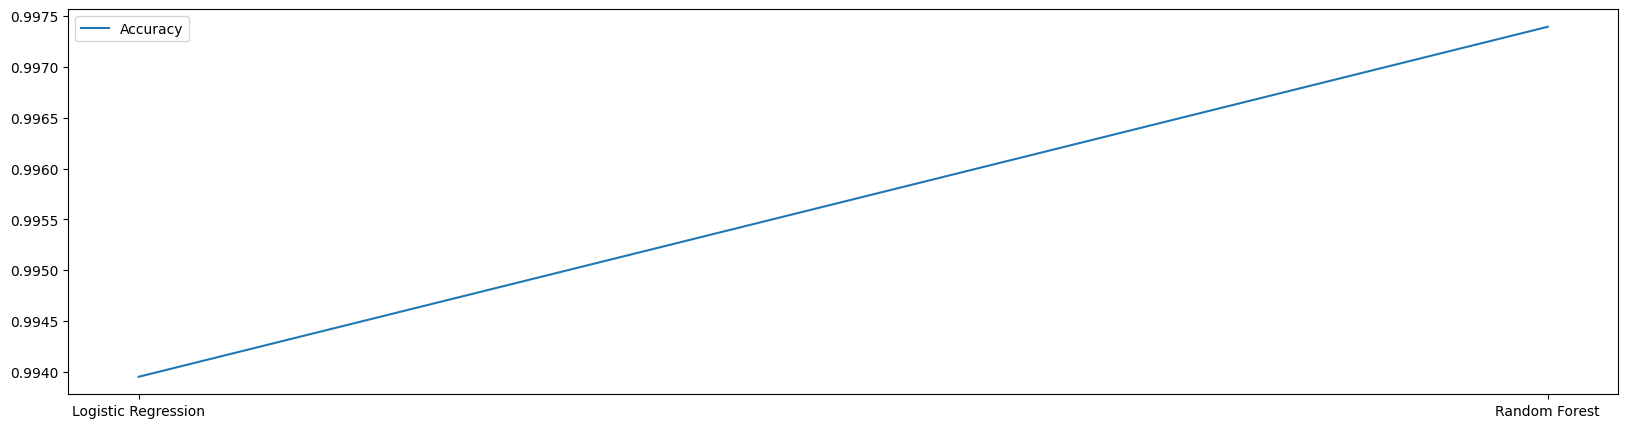

In [49]:
fig,ax = plt.subplots(figsize= (20,5))
plt.plot(AccResult.Algorithm,AccuracyResult,label = "Accuracy")
plt.legend()
plt.show()

# Hassasiyet (Precision) Hesaplama

In [50]:
precLR = precision_score(y_test, pred_LR)
precRF = precision_score(y_test, pred_RF)
PrecResult = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest"], "Precision": [precLR,precRF]})
PrecResult

,Algorithm,Precision
0,Logistic Regression,0.000000
1,Random Forest,0.888283


# Geri Çağırma (Recall) Hesaplama

In [51]:
recall_LR = recall_score(y_test, pred_LR)
recall_RF = recall_score(y_test, pred_RF)
RecallResult = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest"], "Recall": [recall_LR, recall_RF]})
RecallResult

,Algorithm,Recall
0,Logistic Regression,0.000000
1,Random Forest,0.605667


1. Lojistik Regresyon modelinin 0 geri çağırma değeri vermesi, bu modelin pozitif sınıfları hiç doğru tahmin etmediği anlamına gelir. Bu, modelin dolandırıcılık olaylarını tespit etme konusunda çok başarısız olduğunu gösterir.
1. Random Forest modeli ise pozitif sınıfları daha iyi tespit edebildiği için geri çağırma değeri daha yüksek. Bu model, dolandırıcılık olaylarını yakalamada daha etkili olabilir.

# F1 Skoru

* **F1 Skoru: Precision (hassasiyet) ve recall (geri çağırma) değerlerinin harmonik ortalamasıdır. Lojistik Regresyon ve Random Forest modellerinin F1 skorlarını hesaplayarak, her iki modelin hem doğruluk hem de geri çağırma açısından genel performansını değerlendirelim.**

In [53]:
F1_LR = f1_score(y_test, pred_LR)
F1_RF = f1_score(y_test, pred_RF)
F1Result = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest"], "F1": [F1_LR, F1_RF]})
F1Result

,Algorithm,F1
0,Logistic Regression,0.000000
1,Random Forest,0.720243


# Karışıklık Matrisi (Confusion matrix)

In [56]:
conf_matrix_LR = confusion_matrix(y_test, pred_LR)
conf_matrix_RF = confusion_matrix(y_test, pred_RF)

conf_matrix_Result = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest"], "Confusion Matrix": [conf_matrix_LR, conf_matrix_RF]})
conf_matrix_Result

,Algorithm,Confusion Matrix
0,Logistic Regression,"[[386650, 200], [2153, 0]]"
1,Random Forest,"[[386686, 164], [849, 1304]]"


1. TN (386650): Model, 386,650 adet negatif durumu doğru tahmin etmiş.
2. FP (200): Model, 200 adet negatif durumu yanlışlıkla pozitif olarak tahmin etmiş.
3. FN (2153): Model, 2,153 adet pozitif durumu yanlışlıkla negatif olarak tahmin etmiş.
4. TP (0): Model hiç doğru pozitif tahmin yapamamış.

Karışıklık matrisini görselleştirelim.

Logistic Regression Confusing Matrix


<Axes: >

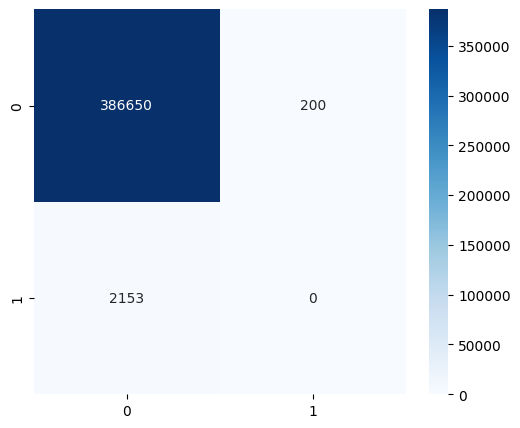

In [59]:
print(f"Logistic Regression Confusing Matrix")
fig,axes = plt.subplots(figsize=(6,5))
sns.heatmap(conf_matrix_LR, annot=True,axes=axes,cmap="Blues",fmt="d")

Random Forest Confusion Matrix


<Axes: >

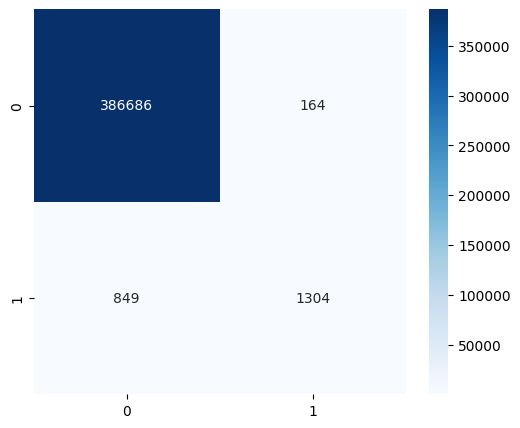

In [60]:
print(f"Random Forest Confusion Matrix")
fig,axes = plt.subplots(figsize=(6,5))
sns.heatmap(conf_matrix_RF, annot=True,axes=axes,cmap="Blues",fmt="d")

# GÖZETİMSİZ ÖĞRENME

* **Gözetimsiz öğrenmede etiket kullanılmadığı için, verisetindeki "is_fraud" etiket sütununu çıkartıyorum. Yani, modelin öğrenme sürecinde hedef değişken olmayacak.**

In [45]:
df_unsupervised = df.drop(columns=["is_fraud"])

In [46]:
df_unsupervised.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [47]:
df_unsupervised.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

* **Eksik veri olmadığını tekrar gördük.**

* **Kategorik verileri One-Hot Encoding ile dönüştürelim**

In [48]:
df_unsupervised = pd.get_dummies(df_unsupervised, columns=['merchant', 'category', 'gender', 'job'])

In [49]:
df_unsupervised.head()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,first,last,street,city,state,zip,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,0,2019-01-01 00:00:18,2703186189652095,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,...,False,False,False,False,False,False,False,False,False,False
1,1,2019-01-01 00:00:44,630423337322,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,...,False,False,False,False,False,False,False,False,False,False
2,2,2019-01-01 00:00:51,38859492057661,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,...,False,False,False,False,False,False,False,False,False,False
3,3,2019-01-01 00:01:16,3534093764340240,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,False,False,False,False,False,False,False,False,False,False
4,4,2019-01-01 00:03:06,375534208663984,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,...,False,False,False,False,False,False,False,False,False,False


* **Veriyi Ölçeklendirme işlemini yapalım.**

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
numeric_columns = df_unsupervised.select_dtypes(include=['float64', 'int64']).columns

In [52]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unsupervised[numeric_columns])

* **DataFrame'e geri çevirerek, kolon isimlerini ve diğer önemli bilgileri koruyarak veriyi daha anlamlı bir şekilde kullanabiliriz ve DataFrame ile analiz yapma kolaylığı sağlayacağız.**

In [53]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# k-Ortalama (k-Means) Kümeleme

* **Küme sayısını belirlemek için bulduğum bir uygulma 'Elbow Method (Dirsek Yöntemi)'. Bunu kullanarak küme sayısını belirleyelim.**

kaggle üzerinde yavaş çalıştığı için kodu Jupyter üzerinde çalıştırıp kontrol ettim ve buraya yorum satırında ekleyeceğim. Dirsek yöntemine göre küme sayısı 3 ile 4 arasında gözüküyor ve 3'ü seçeceğim. Jupyter da çalıştırdığım kod:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = boş liste
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

 Elbow grafiği
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Toplam Hata Kareleri (Inertia)')
plt.title('Elbow Method')
plt.show()

In [54]:
from sklearn.cluster import KMeans

In [78]:
n_clusters = 7    #Küme sayımız.

In [79]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [80]:
labels = kmeans.labels_    #Küme etiteklerini alıyoruz.

In [81]:
df_unsupervised['Cluster'] = labels    #Küme etiketlerini DataFrame'e ekliyoruz.

Küme merkezlerini inceleyelim.

In [82]:
cluster_centers = kmeans.cluster_centers_

In [83]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_scaled.columns)
print(cluster_centers_df)

   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -0.888084 -0.316903 -0.012195  0.239366 -0.970112 -0.038812 -0.109392   
1    0.884937 -0.316999 -0.007013 -0.563366  0.568933  0.549274 -0.179164   
2    0.868106 -0.316867  0.003849  0.213997 -1.032645 -0.020158 -0.101173   
3    0.000456  3.154869  0.004761 -0.089820 -0.131250  0.197767 -0.154070   
4    0.002870 -0.038376  0.008440  1.404647  0.533805 -1.853665 -0.089859   
5   -0.005002 -0.064253  0.029600  0.362480 -0.663470 -0.246248  5.100954   
6   -0.872523 -0.316988  0.002528 -0.614243  0.574286  0.586841 -0.175729   

   unix_time  merch_lat  merch_long  
0  -0.880642  -0.968258   -0.038945  
1   0.877726   0.567935    0.549105  
2   0.860549  -1.030651   -0.020289  
3   0.000390  -0.130580    0.197485  
4   0.002693   0.531660   -1.852578  
5  -0.005670  -0.660602   -0.246107  
6  -0.865030   0.573441    0.586600  


# Küme Analizi

* **PCA (Principal Component Analysis) ile Görselleştirme**

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [85]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

İki boyutlu hale getirdik.

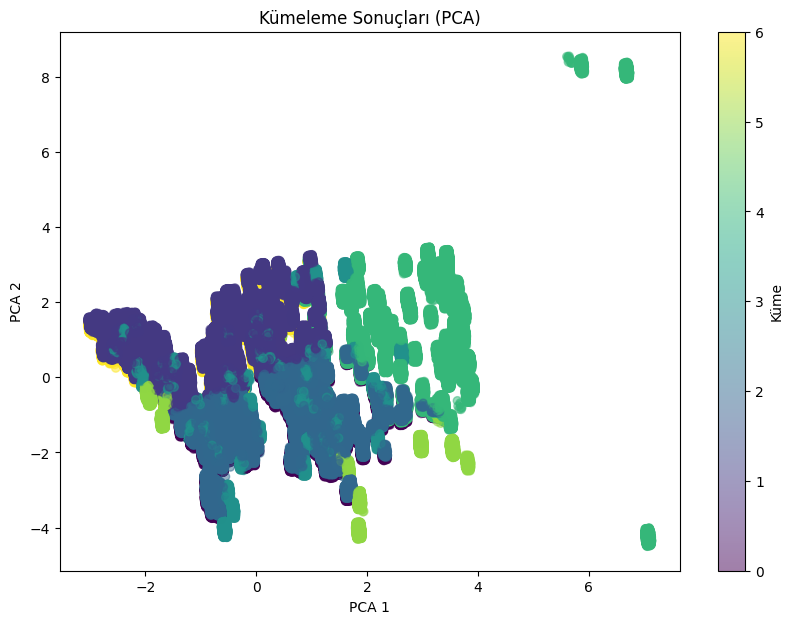

In [86]:
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Küme')
plt.title('Kümeleme Sonuçları (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Silhouette Skoru İle Performans Değerlendirme**:
Silhouette skoru, her veri noktasının kendi kümesindeki benzerliğini ve diğer kümelere olan uzaklığını ölçer. Skor -1 ile 1 arasında değişir. 1’e yakın değerler iyi bir kümelenmeyi gösterir.

Silhouette Skoru İle Performans Değerlendirme işlemi çok uzun sürdü ve sonuç alamadım. Bundan dolayı diğer bir yol olarak 'inertia hesaplaması' yaptım. Veri noktalarının merkezlerden ne kadar uzak olduğunu ölçtüm fakat değer yüksek çıktı. küme sayımız 3 iken '9090784.320191724', küme sayısını 4 yaptığımda '7975214.703257468' ve küme sayısını 7 yaptığımda '5908296.710507568' sonuçlarını aldım. küme sayısını dirsek metodundaki değişime göre değiştirdim ve son sonuç ile bırakıyorum.

In [87]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 5908296.710507568


In [88]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_scaled.columns)
print(cluster_centers_df)

   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -0.888084 -0.316903 -0.012195  0.239366 -0.970112 -0.038812 -0.109392   
1    0.884937 -0.316999 -0.007013 -0.563366  0.568933  0.549274 -0.179164   
2    0.868106 -0.316867  0.003849  0.213997 -1.032645 -0.020158 -0.101173   
3    0.000456  3.154869  0.004761 -0.089820 -0.131250  0.197767 -0.154070   
4    0.002870 -0.038376  0.008440  1.404647  0.533805 -1.853665 -0.089859   
5   -0.005002 -0.064253  0.029600  0.362480 -0.663470 -0.246248  5.100954   
6   -0.872523 -0.316988  0.002528 -0.614243  0.574286  0.586841 -0.175729   

   unix_time  merch_lat  merch_long  
0  -0.880642  -0.968258   -0.038945  
1   0.877726   0.567935    0.549105  
2   0.860549  -1.030651   -0.020289  
3   0.000390  -0.130580    0.197485  
4   0.002693   0.531660   -1.852578  
5  -0.005670  -0.660602   -0.246107  
6  -0.865030   0.573441    0.586600  
